# Fertility Rates Wordwide: Analysis and Predictive model

This work is made of two notebooks:
- Notebook 1: data collection, data exploration and analysis
- Notebook 2: Machine Learning Model for predicting fertility rates

# Notebook 2/2: Machine Learning Model for predicting fertility rates

### Import Libraries

In [1]:
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
import plotly.express as px

### Loading Data

In [6]:
database = pd.read_csv(r"C:\Users\f93495c\Downloads\franalysis.csv", sep = ";")

In [27]:
database.shape

(3089, 11)

### Train-test Split

In [7]:
features = [ 'country_code', 'year', 'gdp per capita', 'life expectancy', 'employment rate', 'wib rate', 'mortality rate (inf)', 'school_enr']
X = database[features]
y = database['fertility rate']

In [8]:
### Normalization
Xa = pd.DataFrame(columns = features[1:], data = MinMaxScaler().fit_transform(X[features[1:]]))

In [9]:
### One-hot encoding
Xb = pd.get_dummies(X['country_code'])

In [10]:
X = pd.concat([Xa, Xb], axis=1)

In [11]:
X.sample(2)

,year,gdp per capita,life expectancy,employment rate,wib rate,mortality rate (inf),school_enr,AFG,AGO,ALB,...,UKR,URY,USA,UZB,VCT,VNM,VUT,WSM,ZAF,ZWE
2999,0.964286,0.491780,0.984356,0.731453,1.000000,0.00000,0.722220,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2101,0.678571,0.061357,0.348915,0.169108,0.257576,0.33967,0.621417,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Linear Regression Model

In [13]:
model = LinearRegression(normalize = True)

In [14]:
model.fit(X_train, y_train)

LinearRegression(normalize=True)

### Predictions

In [15]:
y_predict = model.predict(X_test)

In [16]:
results = pd.DataFrame({'y_test':y_test, 'prediction':y_predict}, index = y_test.index)

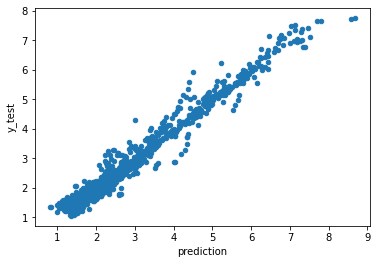

In [17]:
results.plot(kind = 'scatter', x = 'prediction', y = 'y_test')

In [18]:
score = model.score(X_test, y_test)

### Analysis

In [19]:
results['check'] = results['y_test'] - results['prediction']
results['check%'] = results['y_test'] / results['prediction'] - 1

In [20]:
results = pd.concat([results, database[features]], axis=1).dropna()

In [21]:
results[features[2:]] = MinMaxScaler().fit_transform(results[features[2:]])

In [22]:
err = 0.4

In [29]:
results.loc[(results['check%'] > err) | (results['check%'] < - err)].sort_values(by = 'check%', ascending = False)[['country_code', 'year', 'check%']]

,country_code,year,check%
2732,ITA,2016,0.643798
2654,ITA,2015,0.596305
2377,UKR,2013,0.440415
45,IRN,1991,0.438178
2248,ITA,2012,0.428431
2712,DEU,2016,0.408165
776,QAT,2000,0.404616
2944,GEO,2018,0.403837
2891,GEO,2017,0.402283
979,QAT,2001,0.401139


In [24]:
results.loc[results['country_code'] == 'ITA']

,y_test,prediction,check,check%,country_code,year,gdp per capita,life expectancy,employment rate,wib rate,mortality rate (inf),school_enr
179,1.25,1.531006,-0.281006,-0.183543,ITA,1993,0.319028,0.852966,0.273677,0.651515,0.044480,0.751220
535,1.22,1.517090,-0.297090,-0.195829,ITA,1997,0.345843,0.879840,0.246663,0.689394,0.030977,0.736349
1027,1.27,1.481445,-0.211445,-0.142729,ITA,2002,0.378967,0.914087,0.282361,0.757576,0.020651,0.699240
1725,1.40,1.308105,0.091895,0.070250,ITA,2007,0.391577,0.943458,0.310822,0.871212,0.015091,0.723830
2154,1.44,1.090332,0.349668,0.320699,ITA,2011,0.370015,0.961830,0.283486,0.871212,0.012708,0.721247
2248,1.43,1.001099,0.428901,0.428431,ITA,2012,0.357847,0.963078,0.279145,0.871212,0.011914,0.725148
2654,1.35,0.845703,0.504297,0.596305,ITA,2015,0.346875,0.970510,0.267246,0.931818,0.010326,0.734106
2732,1.34,0.815186,0.524814,0.643798,ITA,2016,0.352037,0.987574,0.276411,0.931818,0.009531,0.742493


In [28]:
px.line(results.loc[results['country_code'] == 'ITA'], x = 'year', y = ['y_test', 'prediction'], title = 'Divergency between actual fertility rates and predicted values in Italy after 2005')

In [26]:
px.line(results.loc[results['country_code'] == 'ITA'], y = features[2:], x = 'year', title = 'Trend of independent variables')

# Results

The results show a model accuracy equal to 96.9%, therefore the model performs well.
In some cases actual values and predicted values significantly diverge (predicted values higher then actual values by > 40%).
This is true, specifically, for Italy:

The model has predicted lower values of fertility rates in Italy after 2005 compared to the actual ones. 
As data show, this is positively correlated with life expectancy as well as with the involvement of women in business (both variables increased in the period 2005+, and negatively correlated with the gdp per capita and the employment rates (which decrease in the same period following the unfarourable economic conditions in Italy). 

Women in business are key for the economic and social developing of a country, and they must be supported by governments by specific laws and regulations in order to avoid the "trade-off" choice between family goals and career paths.

Moreover, the decrease in GDP per capita is an alarming sign of a country that is not able to overcome internal economic unbalances. With no gdp growth in the short term, only natality incentives (subsidies or grants) can invert the negative trend in fertility rates.